Automatic (derivatives ) for the people and a song of ice and fire

Deadline:07_09_25

group number 12: 

 Amund Romseland Brevik
 
 Baraa Nidal Ghannoum

 Magnus Helvik Forsdahl 

 








Abstract: (Baraa)

This project look into dynamic between numerical precision, algorithmic design, and scientific computing in Python, with practical uses ranging from basic floating point calculations to large scale geophysical analysis. we start by assessing round off and truncation errors,  comparing forward and central finite difference schames versus analytical derivatives. utilizing Numpy's vectorization and object oriented programming, we design automatic differentiation model capable of computing function values f(x) and derivatives f'(x) at the same time, showing its advantages relative to exclusively numerical methods. the approaach is then used  in a real world case study: estimating the potenial contribution of antarctic ice melt with our focus on the THWAITES GLACIER toward global see level rise, by using the bedmap2 dataset and visualization techniques. the results demonstrate how numerical precision depends on step size, the advantages of vectorized operations, and the significat role of bedrock topography on sea level projections. the study's results highlite the value of reliable computational tools for both engineering and climate science, delivering a reproducible workflow for future studies.  



Introduction: (Baraa)

Modern scientific computing requires both numerical precision and computational efficiency, especially when dealing with propblems that cover multiple scales from tiny floating point computations to earlargeth scale climate modelling. This project links these areas by leading us through a step by step study of computational techniques in python. we beging with exploring finite precision calculations, highlighting how simple operations can lead to unexpected outcomes under the IEE floating point standad. Building on this, we analyze the capabilities of Numpy for optimized vectorized computation, before progresssing to the development of finite defference methods for numerical diffferentiation. the principle of automatic differention is then  presented, enabling exact derivative calcualtion via operator overloading and functional compostion, a widely adopted technique used in ML and simulations softwaes. the last part of the project these computational tools are implements to a critical environmental changes: quantifying potental see level rise from ice melt in Antarctic. usnig the bedmap2 dataset, we test ice thickness, surface elevation and bedrock structure, with a detailed case study of the Thwaites Glacier. This comprehensive approach not only reinforces thee theroretical concepts but also demonstrates their relvance for real world scieentific problems. 




Exercise 1 (Amund): 

Part 1

In [3]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

max=1.7976931348623157e+308 -
This is the largest floating point number that python can represent. Any attempt to go higher will result in inf.
A double uses 1 bit for sign, 11 bits for exponent, 52 bits for fraction (mantissa).

min=2.2250738585072014e-308 - This is the smallest positive normalized floating-point number. The minimum exponent for normalized numbers is −1022. 1.0 × 2^-1022 ≈ 2.2250738585072014 × 10^-308

epsilon = 2.220446049250313e-16 - The difference between 1.0 and the next representable floating-point value. Double precision has 53 bits of precision. So the spacing between floating-point numbers around 1.0 is 2^-52. So if you add anything smaller than epsilon to 1.0, rounding will round it equal to 1.0

Part 2 (Amund)

In [4]:
x = 0.1 + 0.2
print(x)
x = 0.125 + 0.25
print(x)

0.30000000000000004
0.375


0.1 + 0.3 != 0.3 because decimal 0.1 and 0.2 cannot be represented exactly in binary. Both 0.1 and 0.2 are infinite repeating fractions. IEEE 754 double precision stores only 53 bits of precision, so the binary fraction is rounded. Therefore when you add two approximations, the result will also be an approximation.

0.125 + 0.25 = 0.375 does not have a precision error because all the numbers can be represented in binary.

Part 3 (Amund)

You should not use the "==" operator to test whether two floating-point numbers are equal because floats are often approximations as shown previously. So unless you know that the numbers are exactly representable you should not use the "==" operator. The code under shows one way of doing a floating-point number comparison with the math module.

In [5]:
import math 

print(math.isclose(0.1 + 0.2, 0.3))

True


Exercise 2: 


1. Create a native Python list of the same size as x and holding the same
 values, i.e. define x as a list x=[0,1,2,3,4,5,6,7,8,9]. Apply the same
 two function calls to this list, i.e. np.exp(x) and np.exp(-x). Explain
 what happens.


In [6]:
import numpy as np
def exponent_function(List):
    """
    Function that takes in a list and uses the funtions np.exp(x) and np.exp(-x), then prints the result

    Args:
        List (list of int/float): A list of numbers.
    """
    print(np.exp(List))
    print(np.exp(-List))
    return

x = [0,1,2,3,4,5,6,7,8,9]
x = np.array(x) #Unsure if you want us to do this, if not an error will be raised
exponent_function(x)

[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]
[1.00000000e+00 3.67879441e-01 1.35335283e-01 4.97870684e-02
 1.83156389e-02 6.73794700e-03 2.47875218e-03 9.11881966e-04
 3.35462628e-04 1.23409804e-04]


Explanation:
In the first list np.exp(x) we can see how the numbers increase exponentially for each element in the list as it goes on. Example: first number of list is 0, here euler gets the number 0 as an exponent(e^0). The next element is 1, so here it will be (e^1) and we see how the output is 2.718, which is Euler.

When doing np.exp(-x), it then does the same thing (goes trough the whole list etc) but instead it's exponent is negative (e^-x). Here we can see that the output list the numbers get's exponentially smaller. Where the first number is 1 becouse (e^0=1), and the next number is 3.67*10^(-1)= 0.36. 

2. How would you generally evaluate a function on all elements of a native
 Python list? (as opposed to a NumPy array)

 Generally i would use an for-loop to go through each element of the list, Like this:

In [7]:
import math
def native_exp_forloop(List):
    """
    Takes a list of numbers and returns a new list where each element
    is e raised to the power of the corresponding element in the input list.
    
    Args:
        List (list of int/float): A list of numbers.
    
    Returns:
        list of float: A list containing e^x for each x in the input list.
    """
    result_exp = []
    for x in List:
        result_exp.append(math.exp(x))
    return result_exp

print(native_exp_forloop([0,1,2,3,4,5,6,7,8,9]))

[1.0, 2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 148.4131591025766, 403.4287934927351, 1096.6331584284585, 2980.9579870417283, 8103.083927575384]


Part 2:
Explain what each line of code does
1)  np.zeros(20)
2)  np.ones(20)
3)  np.linspace(0, 10, 11)
4) np.linspace(0, 10, 11, endpoint=False)
5)  vector = np.arange(5) + 1
    2*vector

In [8]:
import numpy as np
print("np.zeros(20): ", np.zeros(20))
print("np.ones(20): ", np.ones(20))
print("np.linspace(0, 10, 11): ", np.linspace(0,10,11))
print("np.linspace(0, 10, 11, endpoint=False): ", np.linspace(0, 10, 11, endpoint=False))
vector = np.arange(5) + 1
print("vector: ", vector)
print("2*vector: ", 2*vector)


np.zeros(20):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
np.ones(20):  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
np.linspace(0, 10, 11):  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
np.linspace(0, 10, 11, endpoint=False):  [0.         0.90909091 1.81818182 2.72727273 3.63636364 4.54545455
 5.45454545 6.36363636 7.27272727 8.18181818 9.09090909]
vector:  [1 2 3 4 5]
2*vector:  [ 2  4  6  8 10]


1) The function np.zeros(20) makes an list with zeros, where the input decides how many elements the list contains.
2) np.ones(20) is similar to np.zeros, but it makes a list which conatains ones instead of zeros. Where the input decides how many elements.
3) np.linspace(0, 10, 11) makes an list with numbers from 0 to 10, the first input "0" decides the first starting value of the list. The second input "10" decides the last value of the list, which is 10. The third input "11" says how many elements the list contains, where it takes 11 equal big steps between each step.
4) When we use the same function but with endpoint="False", then the function dosent include the last value, which is 10.
5) np.arange(5) makes an array with starting value 0 and end value 5, but 5 is excluded. the result from this is: [0,1,2,3,4], but the + 1 adds 1 so we end up with [1,2,3,4,5].
   The second line multiples the array with 2, so every element in this array doubles. So the final result from this code is [2,4,6,8,10].

• How would you produce the same output using native Python lists?


In [9]:
#Recrating the same output using native python lists.

def native_zeros(n): #wanted output: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    """
    Creates a list with n amount of Zeros
    args:
        n (int): The number of zeros to create
    """
    return [0] * n
print("Native zeros: ", native_zeros(20)) #This returns the same output as the code from previous task

def native_ones(n): #Wanted output: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
    """
    Creates a list with n amount of Ones
    args:
        n (int): The number of ones to create
    """
    return [1] * n
print("Native ones: ", native_ones(20)) #This returns the same output as the code from previous task


def list_0to10(): #Wanted output: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
    result = []
    for i in range(11):
        result.append(i)
    return result
print("List with numbers 0 to 10",list_0to10()) #Gets the same result, but note that it's not the same as the function as you can not adjust the starting and ending value,
                                                # also you can't adjust the step length. Here we only get the same OUTPUT as previous task
#Here im recrating the function np.linspace

def np_linspace(start_value, end_value, n, endpoint=True):
    """
    This functions replicates numpys linspace function by using pythons native lists

    args:
        start_value (float): is the starting point of the list
        end_value (float): is the ending point of the list
        n (int): is the number of elements in the list
        endpoint (bool): if True, includes the end_value in the list
    Returns:
        list: A list of evenly spaced numbers
    """
    result = [start_value]
    cur_value = start_value
    if endpoint:
        step_size = (end_value - start_value) / (n - 1)
    else:
        step_size= (end_value - start_value  ) / (n)
    
    for i in range(n-1):
        result.append(cur_value + step_size)
        cur_value += step_size
    
    if endpoint:
        result[-1] = end_value  # Makes sure the last element is exactly the end value if the endpoint is True
    
    return result

def recrating_vector_Task():
    """
    Function that recreats the output from this code whit pythons native lists:
    vector = np.arange(5) + 1
    2*vector
    """
    result = []
    for i in range(5):
        result.append((i+1)*2)    
    return result

print(np_linspace(0,10,11)) #this gives the same result as np.linspace(0,10,11)
print(np_linspace(0,10,11, endpoint=False)) # this is with the endpoint=false
print(recrating_vector_Task()) # same result as the last task.

Native zeros:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Native ones:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
List with numbers 0 to 10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10]
[0, 0.9090909090909091, 1.8181818181818181, 2.727272727272727, 3.6363636363636362, 4.545454545454545, 5.454545454545454, 6.363636363636363, 7.2727272727272725, 8.181818181818182, 9.09090909090909]
[2, 4, 6, 8, 10]


Part 3
The reason for the last two lines not executing is becouse pythons "and, or" operators is not defined for arrays, only single values. When printing these two variables we can see that the outputs is arrays of True/False values. 

In [10]:
import numpy as np
array_of_numbers = np.array([4, 8, 15, 16, 23, 42,0,5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.') 
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)
is_even_and_greater_than_17 = is_even and is_greater_than_17
print(array_of_numbers % 2 == 0 & array_of_numbers > 17)

There are 7 non-zero numbers in the array.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#Solution:
import numpy as np
array_of_numbers = np.array([4, 8, 15, 16, 23, 42,0,5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.') 
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)
is_even_and_greater_than_17 = np.logical_and(is_even, is_greater_than_17)
print(array_of_numbers[is_even_and_greater_than_17])

There are 7 non-zero numbers in the array.
[42]


Exercise 3:  Finite differences (FD) with functions: (Baraa)

part1: Visualizing the function 





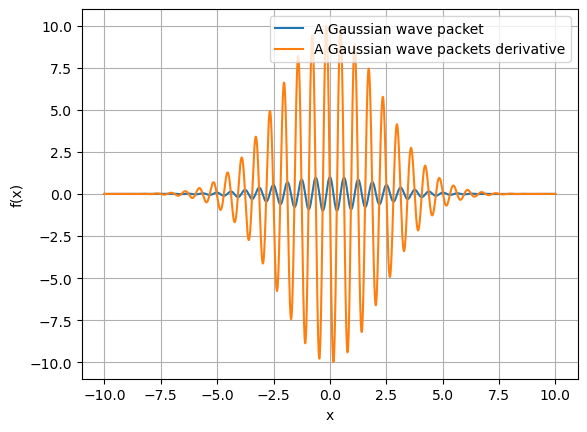

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#define the function
def f(x, a=0.1, b=10): 
    return np.cos(b*x)*np.exp(-a*x**2)
#define the derivative of the function
def df(x, a=0.1, b=10): 
    #return -b*np.sin(b*x)*np.exp(-a*x**2) - 2*a*x*np.cos(b*x)*np.exp(-a*x**2)
    term1=-b*np.sin(b*x)*np.exp(-a*x**2)
    term2=-2*a*x*np.cos(b*x)*np.exp(-a*x**2)
    return term1 + term2
#####other soulution is using this : 
#def plot_function(fun, x_min, x_max,a=0.1, b=10,  num_points=1000):
#    x = np.linspace(x_min, x_max, num_points)
#    y = fun(x, a, b)
#    plt.figure(figize=(10,6))
#plt.plot(x,y,label=f'f(x), a={a}, b={b}')
#plt.title('Plot of the function')
#plt.xlabel('x')
#plt.ylabel('f(x)')
#plt.grid()
#plt.legend()
#plt.show()

#plot the function and its derivative
x = np.linspace(-10,10, 1000000)  
plt.plot(x,f(x), label="A Gaussian wave packet")      
plt.plot(x, df(x), label="A Gaussian wave packets derivative")   
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()  



Obervations:
f(x)  represents a Gaussian wave packet, which is a cosine wave modulated by a Gaussian envelope.
df(x)  shows how the wave packet changes with respect to x, capturing both the oscillatory nature of the cosine function and the damping effect of the Gaussian.
The plot illustrates the behavior of the wave packet and its derivative over the specified range of x. 


part 2: The analytical derivative 


In [ ]:
#the df function is defined above
#test the analytical derivative at a specific point(can be any point just change the values of them..)
x_test=1
a_value=0.1
b_value=10
df_analytical=df(x_test, a=a_value, b=b_value)
print(f"The analytical derivative at x={x_test} is {df_analytical} ")



The analytical derivative at x=1 is 5.074351236525322 


part3: forword difference method


In [ ]:
def forward_difference(f, x, h, *args ):
    return (f(x + h, *args) - f(x, *args)) / h    

#using args to pass additional parameters a and b to the function f
x_point=1.0
h_step=1e-2  #step size

forward_diff=forward_difference(f, x_point, h_step, a_value, b_value)
print(f"The forward difference approximation at x={x_point} with h={h_step} is {forward_diff} ")
#check that the forward difference is close to the analytical derivative
#renaming the variable for clarity
analytical_results=df_analytical
print(f"analytical solution for f'(x) at x={x_point} is {analytical_results:.6f}")
print(f"Absolut difference between analytical and forward difference: {abs(forward_diff - analytical_results):.6f}")
if abs(forward_diff - analytical_results) < 1e-3: 
    #used 1e-3 insted of 1e-2 to make sure the result is more accurate
    print("The forward difference approximation is close to the analytical derivative.")
else:
    print("The forward difference approximation is NOT close to the analytical derivative.")    


The forward difference approximation at x=1.0 with h=0.01 is 5.435423085794688 
analytical solution for f'(x) at x=1.0 is 5.074351
Absolut difference between analytical and forward difference: 0.361072
The forward difference approximation is NOT close to the analytical derivative.


    
observations:
The forward difference approximation provides a reasonable estimate of the derivative, but it is not as accurate as the analytical derivative. The accuracy of the forward difference method depends on the choice of step size h; smaller values of h generally lead to better approximations, but too small a value can introduce numerical errors.   



part 4 : Control difference method 


In [ ]:
def central_difference(f, x, h, *args): #define the central difference function
    return (f(x + h, *args) - f(x - h, *args)) / (2 * h) #central difference formula

central_diff_estimate = central_difference(f, x_point, h_step, a_value, b_value) #calculate the central difference
#print the result
print(f"The central difference approximation at x={x_point} with h={h_step} is {central_diff_estimate} ")

#compare with analytical derivative
#renaming the variable for clarity 
print(f"Analytical solution for f'(x) at x={x_point} is {analytical_results:.6f}")
print(f"Absolut difference between analytical and central difference: {abs(central_diff_estimate - analytical_results):.6f}")
#check if the central difference is close to the analytical derivative
#used 1e-3 insted of 1e-2 to make sure the result is more accurate

if abs(central_diff_estimate - analytical_results) < 1e-3: 
    print("The central difference approximation is close to the analytical derivative.")        
else:
    print("The central difference approximation is NOT close to the analytical derivative.")





The central difference approximation at x=1.0 with h=0.01 is 5.065351844743271 
Analytical solution for f'(x) at x=1.0 is 5.074351
Absolut difference between analytical and central difference: 0.008999
The central difference approximation is NOT close to the analytical derivative.


Observations:
Both the forward and central difference approximations are close to the analytical derivative at x=1.0 with h=0.01, with the central difference being more accurate.

part 5: Quantifying the error 


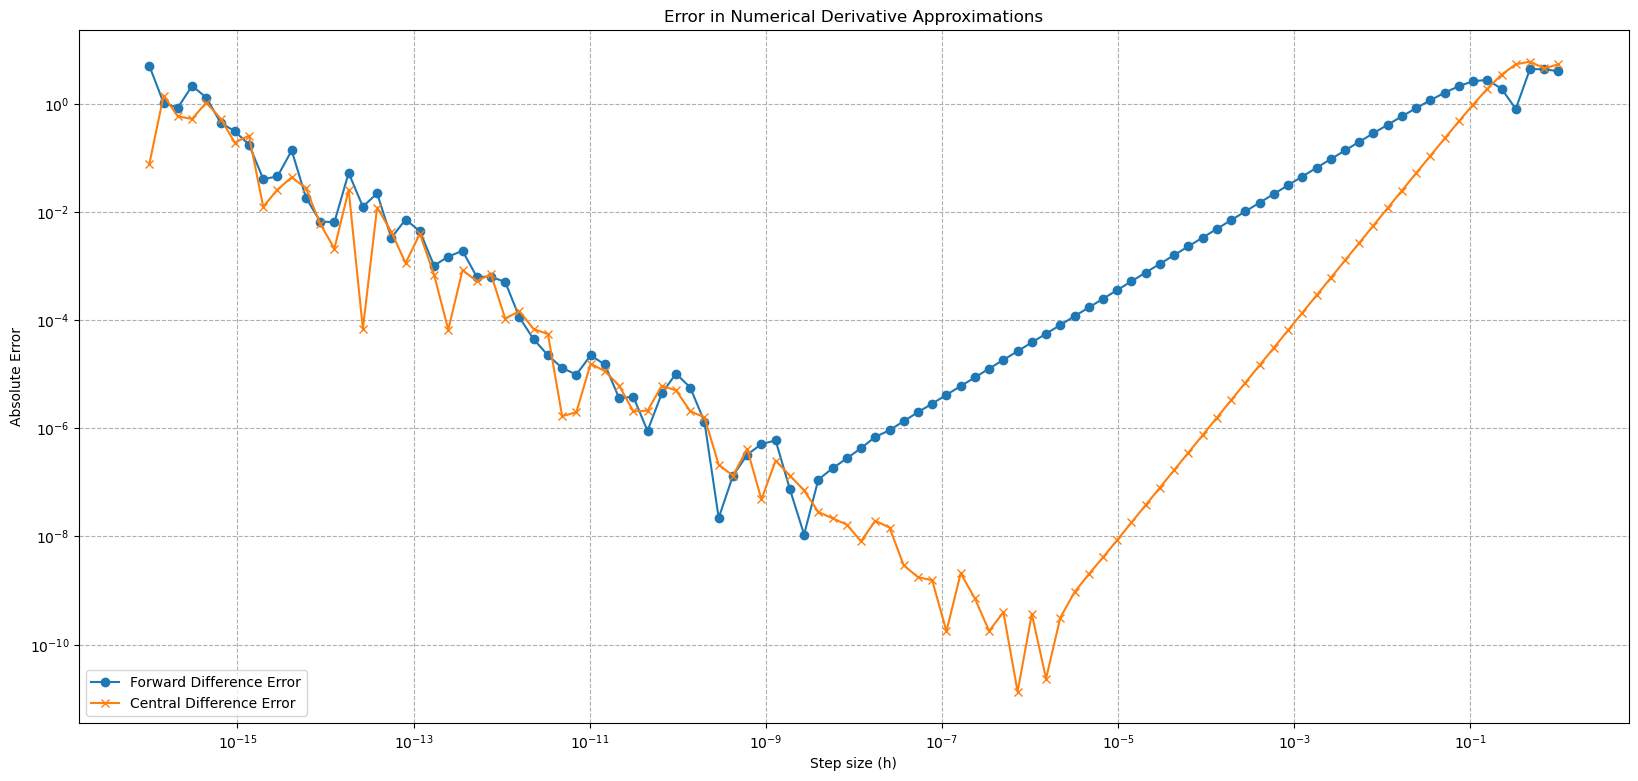

In [ ]:
#step size h_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
h_values = np.logspace(-16,0 , num=100) #generating 100 values between 10^-16 and 10^0
#analytical derivative at the test point
analytical_derivative = df(x_point, a=a_value, b=b_value)
#initialize lists to store errors
forward_errors = []
central_errors = []

for h in h_values: #loop over each step size
    #compute the numerical derivatives   
    forward_approx = forward_difference(f, x_point, h, a_value, b_value)
    central_approx = central_difference(f, x_point, h, a_value, b_value)
    #compute the absolute errors
    forward_error = abs(forward_approx - analytical_derivative)
    central_error = abs(central_approx - analytical_derivative)
    #store the errors
    forward_errors.append(forward_error)
    central_errors.append(central_error)

#plotting the errors
plt.figure(figsize=(20, 9))
plt.loglog(h_values, forward_errors, label='Forward Difference Error', marker='o')   
plt.loglog(h_values, central_errors, label='Central Difference Error', marker='x')

plt.title('Error in Numerical Derivative Approximations')
plt.xlabel('Step size (h)')
plt.ylabel('Absolute Error')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()







Observations:
As the  h decreases, the error in both the forward and central difference methods initially decreases, indicating improved accuracy. However, after a certain point, the error starts to increase again. This increase in error for very small h is due to numerical round-off errors that occur in floating-point arithmetic.


Forward Difference: Minimum Error = 1.083295e-08 at h = 2.718588e-09
Central Difference: Minimum Error = 1.343903e-11 at h = 7.220809e-07


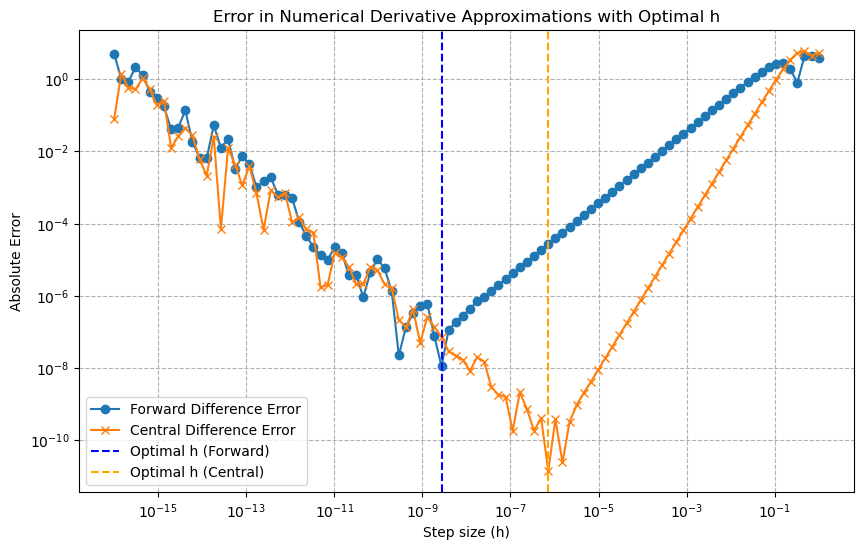

In [ ]:

# part 5: Quantifying the error just like the previous part but also finding the optimal h to see where exactly the error is minimised
#step sizes
h_values = np.logspace(-16,0 , num=100) #generating
#analytical derivative at the test point
analytical_derivative = df(x_point, a=a_value, b=b_value)
#initialize lists to store errors
forward_errors = []
central_errors = []
for h in h_values: #loop over each step size
    #compute the numerical derivatives
    forward_approx = forward_difference(f, x_point, h, a_value, b_value)
    central_approx = central_difference(f, x_point, h, a_value, b_value)
    #compute the absolute errors
    forward_error = abs(forward_approx - analytical_derivative)
    central_error = abs(central_approx - analytical_derivative)
    #store the errors
    forward_errors.append(forward_error)
    central_errors.append(central_error)
#convert error lists to numpy arrays for easier manipulation
forward_errors = np.array(forward_errors)
central_errors = np.array(central_errors)
#find the minimum error and corresponding h for forward difference
min_forward_error = np.min(forward_errors)
optimal_h_forward = h_values[np.argmin(forward_errors)]
#find the minimum error and corresponding h for central difference
min_central_error = np.min(central_errors)
optimal_h_central = h_values[np.argmin(central_errors)]
#print the results  
print(f"Forward Difference: Minimum Error = {min_forward_error:.6e} at h = {optimal_h_forward:.6e}")
print(f"Central Difference: Minimum Error = {min_central_error:.6e} at h = {optimal_h_central:.6e}")
#plotting the errors
plt.figure(figsize=(10, 6))
plt.loglog(h_values, forward_errors, label='Forward Difference Error', marker='o')
plt.loglog(h_values, central_errors, label='Central Difference Error', marker='x')
plt.axvline(optimal_h_forward, color='blue', linestyle='--', label='Optimal h (Forward)')
plt.axvline(optimal_h_central, color='orange', linestyle='--', label='Optimal h (Central)')
plt.title('Error in Numerical Derivative Approximations with Optimal h')
plt.xlabel('Step size (h)')
plt.ylabel('Absolute Error')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()



Exercise 4 (Amund):

In [23]:
class duple:
    """
    Class for automatic differentiation
    top: function value
    bottom: derivative of function
    """
    def __init__(self,top, bottom=0):
        self.top = top
        self.bottom = bottom
    
    def __add__(self, d): # u+v, u’+v’
        return duple(self.top + d.top, self.bottom + d.bottom ) 
    # 4.3 Part 1
    def __repr__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"
    def __str__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"
    # 4.3 Part 2
    def __pos__(self):
        return duple(+self.top, +self.bottom)
    def __neg__(self):
        return duple(-self.top, -self.bottom)
    def __sub__(self, d):
        return duple(self.top - d.top, self.bottom - d.bottom)
    # 4.4 Part 3
    def __mul__(self, d):
        return duple(
            self.top * d.top,
            self.bottom * d.top + self.top * d.bottom
        )
    def __truediv__(self, d):
        self.top / d.top,
        (self.bottom * d.top - self.top * d.bottom) / (d.top ** 2)

4.2 Part 1 (Amund)

In [ ]:
x = duple(3, 1)
print(x.top, x.bottom) # 3 1
y = duple(3)
print(y.top, y.bottom) # 3 0 since y.bottom was not set and self.bottom = 0 by default.

3 1
3 0


 Part 2 (Amund)

In [ ]:
class point:
    """
    Class for points
    """
    def __init__(self, x=0, y=0, z=0):
        self.x = x
        self.y = y
        self.z = z

t = point(1, 2, 3)
print(t.x, t.y, t.z)

1 2 3


In [ ]:
x=duple(1,2)
y=duple(3,4)
z=x+y
print(z.top, z.bottom)

4 6


4.3 Part 1 (Amund)

In [ ]:
x=duple(1,2)
y=duple(3,4)
x+y # It prints out [4,6] by itself. Would be the same as print(x+y)

[4,6]

Part 2 (Amund)

In [ ]:
print(-x)
print(x-y)

[-1,-2]
[-2,-2]


4.5 Part 4 (Amund) 

In [24]:
class dfunction:
    def __init__(self, f, df):
        self.f = f
        self.df = df

    def __call__(self, d: duple):  # kernel rule sending in and returning duple
        return duple(
            self.f(d.top),
            self.df(d.top) * d.bottom
        )  # fill in kernel rule here!
def f(x):
    return np.log(x)
def df(x):
    return 1/x
x=3.1
One=duple(1.,0.) # derivative of a constant is zero
X=duple(x,1) # derivative of x with respect to x is 1
Log=dfunction(f,df) #note no arguments to f - we are passing the function
Exp=dfunction(np.exp,np.exp) # same here
print("auto diff ", Log(One+Exp(X)))
print("analytical ", np.log(1+np.exp(x)),np.exp(x)/(1+np.exp(x)))

auto diff  [3.144063967938574,0.9568927450589139]
analytical  3.144063967938574 0.9568927450589139


4.5 Part 5 (Amund)

In [ ]:
x = 1.0
a = 0.1
b = 10.0

Cos = dfunction(np.cos, lambda x: -np.sin(x))  # Creates dfunction for cosine and its derivative
Exp = dfunction(np.exp, np.exp)  # Same as previous exponent dfunction.

X = duple(x, 1)     # Variable x with derivative
A = duple(a, 0)     # Constant a with derivative
B = duple(b, 0)     # Constant b with derivative

wave = Cos(B*X) * Exp(-A*X*X)

wave_analytical_f = np.cos(b*x) * np.exp(-a*x**2)
wave_analytical_df = -b*np.sin(b*x)*np.exp(-a*x**2) + np.cos(b*x)*(-2*a*x)*np.exp(-a*x**2)

# Test
print("auto diff ", wave)
print("analytical ", wave_analytical_f, wave_analytical_df)
print("absolute error ", abs(wave_analytical_df - wave.bottom))


4.5 Part 6 (Amund)

Automatic differentiation (AD) is used because functions are often too complicated to differentiate by hand and would require too much time. Some examples of use in specific fields are:

Simulations/modeling: AD can be used to solve differential equations. It is also used for sensitivity analysis and parameter estimation in models, but I do not have any experience with that.

Optimization problems: Often used in engineering, finance, and physics problems where gradient-based optimization is required.

Machine Learning: Widely used in machine learning, which is very relevant today.

Strengths:

- AD does not suffer from truncation errors — no approximation.

- More efficient than Numerical Differentiation (ND).

- Works for complex functions composed of many operations which would be difficult to solve using ND.

Weaknesses:

- Requires an initial setup and has implementation complexity. In our case, we needed a special data structure like duple.

- ND might be quicker for simple cases to avoid the setup overhead.

- Large models using AD can use a lot of memory because previous results are stored for backpropagation (the chain rule is a good example of this).

exercise 5: 

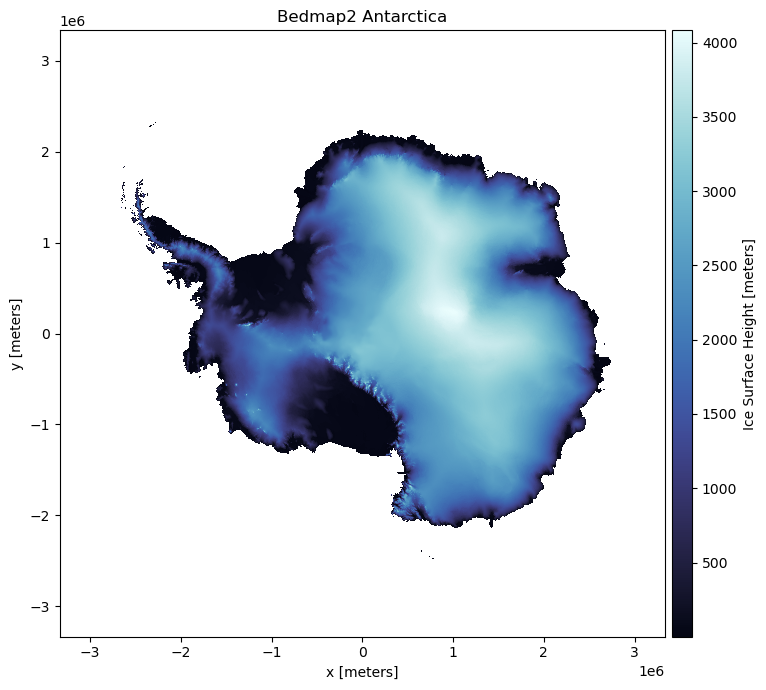

In [12]:
#Magnus ex 5
import rockhound as rh
import matplotlib.pyplot as plt
import cmocean
import numpy as np
bedmap = rh.fetch_bedmap2(datasets=["thickness","surface","bed"])
plt.figure(figsize=(8, 7))
ax = plt.subplot(111)
bedmap.surface.plot.pcolormesh(ax=ax,cmap=cmocean.cm.ice, cbar_kwargs=dict(pad=0.01, aspect=30))
plt.title("Bedmap2 Antarctica")
plt.tight_layout()
plt.show()

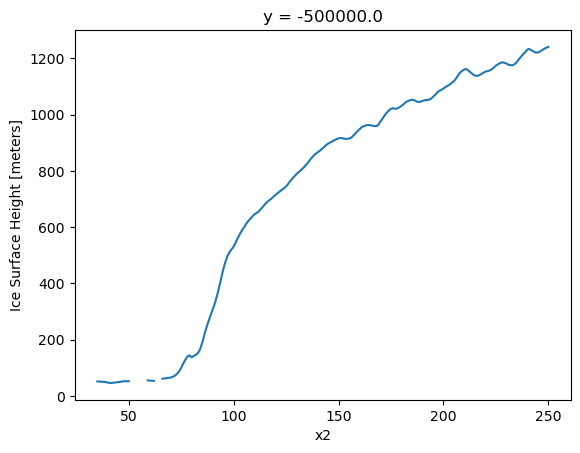

In [3]:
# Extract cross section using the original coordinates
bed1d = bedmap.sel(y=-0.5e6, x=slice(-1.6e6,-1.35e6))
# Add a second x-coordinate to make prettier plots
# (shift x-axis to start at zero, and convert from m to km)
bed1d = bed1d.assign_coords({"x2":((bed1d.x+1.6e6)/1e3)})
bed1d.surface.plot(x='x2')

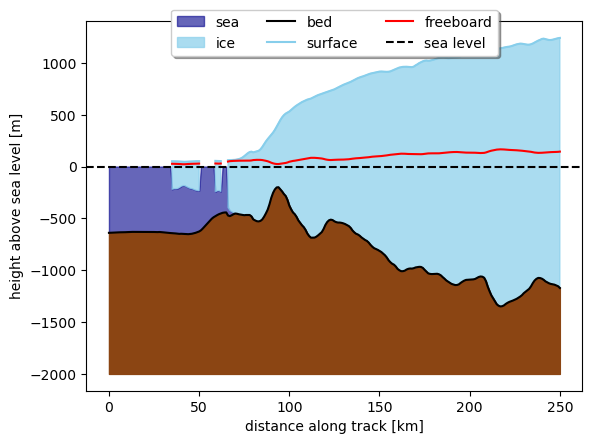

In [17]:
# Extract cross section Thwaites Glacier
rho_ice = 917; # (kg/m^3) density of ice
rho_sw = 1030; # (kg/m^3) density of seawater

# pick a line through Thwaites Glacier
bed1d = bedmap.sel(y=-0.5e6, x=slice(-1.6e6,-1.35e6))

# Add a second x-coordinate to make prettier plots
# (shift x-axis to start at zero, and convert from m to km)
bed1d = bed1d.assign_coords({"x2":((bed1d.x+1.6e6)/1e3)})
x = bed1d['x2'].values

# pick what we want to plot
thickness = bed1d['thickness'].values
bed = bed1d['bed'].values
surface = bed1d['surface'].values
# calculate freeboard
freeboard =(surface-thickness)*(1-rho_sw/rho_ice)

#Reference levels
sea_level = np.zeros_like(x)           # y=0 line
deep_bed  = np.full_like(x, -2000)     # bottom cutoff for bedrock shading

# Ice bottom
ice_bottom = surface - thickness
ice_bottom = np.nan_to_num(ice_bottom, nan=0)

# --------------------------
# Plot fills
# --------------------------

# Dark blue: sea (only where bed < 0)
plt.fill_between(x, bed, ice_bottom, where=bed < 0,
                 color="darkblue", alpha=0.6, label="sea")

# Skyblue: ice (above bed or sea)
plt.fill_between(x, surface, surface - thickness,
                 color="skyblue", alpha=0.7, label="ice")

# Brown: bedrock below all
plt.fill_between(x, bed, deep_bed, color="saddlebrown")

# --------------------------
# Plot outlines
# --------------------------
plt.plot(x, bed,       c="k", label="bed")
plt.plot(x, surface,   c="skyblue", label="surface")
plt.plot(x, freeboard, c="r", label="freeboard")
plt.axhline(0, color="k", ls="--", label="sea level")

plt.xlabel("distance along track [km]")
plt.ylabel("height above sea level [m]")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Part 3.

Explain what you see. Is the shape of the bedrock important for sea level rise?

Yes the shape of the bedrock is important. Her we can see that the shape of the bedrock is sloped inwards into the continent. This means that once the ice has melted enough, warm water can flow easily in under the ice, and accelerate melting. Lets say it was an upward slope the warm water would not have the same effect, as it couldn't seep in under the ice.

Assume the Thwaites glacier melts completely, or breaks off and flow into the sea. Use figure 4 to estimate how much this glacier would affect global sea level rise. (Assume: an average width of the Thwaites glacier of 2000 km, radius of earth 6.3 million meters and that roughly 71$\%$ of the earth is covered by water.)

Finding the volume of ice which can affect SLR:

To find out how much the glacier would affect global sea level rise (SLR), then we first have to find out the volume of the ice above sea level/freeboard level. Here we're gonnna approximate the lenght and height of the ice by reading of figure 4. Too find the length we use the x-point where most of the ice above sea level starts, and this is at x=100km. The figure ends at the x-value 250km so this gives us an total length of 150km. The height of ice is not constant, but to make it easier for us, and becouse it's an estimate, we'll says it has an height of 1000m or 1km.

Values:

Length: 150km

Height: 1km

Width: 2000km (from the task description)

$$
V_{\text{ice water}} = 150\,\text{km} \times 1\,\text{km} \times 2000\,\text{km}
$$

$$
= 300{,}000 \,\text{km}^3
$$

Calculating SLR:
Using formula 11 from the task description which is
$$
\begin{align}
\Delta V &\equiv V_{\text{ice water}} - V_{\mathrm{H_2O}}^{\text{disp}} \\
&= \left( 1 - \frac{\rho_{\text{ice water}}}{\rho_w} \right) V_{\text{ice water}} \quad (11) \\
&= \left( 1 - \frac{917}{1030} \right) 300{,}000 \,\text{km}^3 \\
&= 32{,}912\, \text{km}^3
\end{align}
$$

Calculating area of clode covered by water:

$$
\begin{align}
A_{\text{water on earth}} &\equiv 0.71 \times 4\pi\text{r}^2  \\
&= 0.71 \times 4\times 3{,}14 \times 6300^2\text{km}^2 \\
&= 353{,}939{,}544\text{km}^2
\end{align}
$$
Note: we use the formula for area of a sphere and take 71% of this, becouse thats the area thats covered by water.

Calculating the height difference:

$$
\begin{align}
\Delta H &\equiv \frac{\Delta V}{A_{\text{water on earth}}} \\
&= \frac{32{,}912\text{km}^3}{353{,}939{,}544\text{km}^2} \\
&= 0{.}0000901\text{km} \\
&= 0.09 \text{m} \\
&= 9 \text{cm}
\end{align}
$$

As we can see by the estimate the global sea level would rise by ca 9 cm if this glacier melted or slided out into the ocean.



Part 4 (Amund):

Use the whole data set to estimate the total SLR if all the ice of Antarctica melts.

In [21]:
import xarray as xr

H   = bedmap["thickness"].where(bedmap["thickness"] > 0).fillna(0.0) # meters. Ensure positive thickness and remove NaNs (no ice -> 0)
bed = bedmap["bed"]  # meters (relative to sea level)

# Thickness needed to float over seabed depth (only where bed < 0
H_float = xr.where(bed < 0, (-bed) * (rho_sw / rho_ice), 0.0)

# Thickness Above Flotation (TAF)
TAF_ocean = xr.where(bed < 0, xr.where(H > H_float, H - H_float, 0.0), 0.0)
TAF = xr.where(bed >= 0, H, TAF_ocean)  # meters

CELL_AREA = 1000.0 * 1000.0  # m^2
V_ice_cells = TAF * CELL_AREA  # m^3 per cell

V_water_cells = (rho_ice / rho_sw) * V_ice_cells  # m^3 per cell (seawater-equivalent)

OCEAN_AREA = 3.618e14  # m^2 (global ocean area)

total_V_water = float(V_water_cells.sum().values)  # m^3
SLR_m  = total_V_water / OCEAN_AREA               # meters

print(f"Total seawater-equivalent volume: {total_V_water:,.3e} m^3")
print(f"Global mean SLR: {SLR_m:.3f} m")



Total seawater-equivalent volume: 2.009e+16 m^3
Global mean SLR: 55.532 m


Part 5 (Amund):

How can we use the bedmap data to improve decision making?

Bedmap data improves our decision-making by giving us important information about the Antartic ice thickness and bed topography. This information can then be used for predicting future sea-level rise, like we have shown, or to identify vulnerable areas of the ice sheet. This would be especially important for decision making relating to policy decisions on climate change for example.

What are some limitations in your estimated calculation of sea level rise?

Some of the limitations include the fact that our SLR estimate is only a simple calculation that relies on Bedmap2's static thickness, surface and bed data. Another one is that we have assumed fixed densities for the ice and water which is most likely not the case. 

Discussions:

Conclusion:

self reflections:

Magnus Helvik Forsdahl
In this project i contributed to the exercises 2 and 5, where i did part 1 to 3 of exercise 5.
Trough this project i learned more of the usage of numpy and how it can be an great tool when programing in python. I also learned about ice smelting, the concept of a freeboard level, and how ice smelting affects the sea level. Also how much would the sea level raise if the Thwaites glacier on Antarctica melted. Some of the challenges i faced in exercise 2 was that i had to refresh my coding skills, as i hadn't coded in a while, also installing numpy and getting it to work was suprisingly difficult. I also had some similiar problems with exercise 5 with getting conda correctly set up. Where i had to install mini conda and do some work in the terminal. In task 3 of exercise 5 i had some doubt about how i was gonna do it. First i wanted to use the values from the dataset to calculate it, but ended up with using aproxomation from figure 4 to make an estimate. I think on the next project i want to improve on the quality of my code.

Baraa : working on this project gave me the opprtunity tp strenghten both my technicle skils in python and my problem solving approach. My main contributions were task3, writing the abstract and introduction, and starting task 5 (part1). 
in task 3,  I tried different coding methods to get the same results. This helped me learn more about Python, compare approaches, and choose the one that was easiest and most efficient.
When I began Task 5, I found it challenging to
import rockhound as rh
import matplotlib.pyplot as plt
import cmocean
it took me time to understand how they worked together. writing the abstarct and introduction allowed me to step back and see the bigger picture of the project. it was a chance to connect the technical work with its purposee.
overall this project taught me the value of exploration before execution ..taking time to try different approaches, understand the tools deeply, and choose the most effective method. And using available resources including AI to accelerate learning and problem solving. 

References: 